In [13]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [8]:
def sigmoid(z):
    # Note that np.exp allow arrays as its input.
    return 1 / (1 + np.exp(-z))

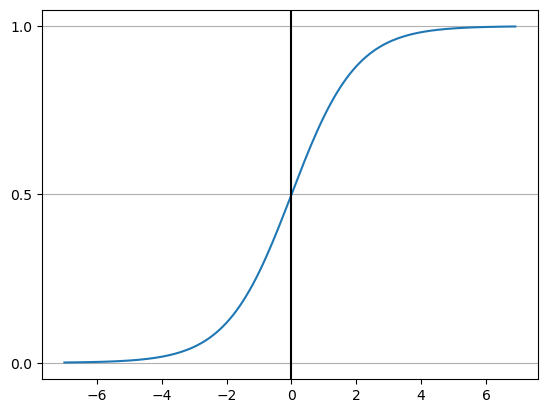

In [9]:
# Visualize the sigmoid function
z = np.arange(-7,7,0.1)
sigma_z = sigmoid(z)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(z, sigma_z)
ax.axvline(0.0, color="black") # Add a vertical line
ax.set_yticks([0, 0.5, 1]) # Add y-ticks
ax.yaxis.grid(True) # Add gridlines

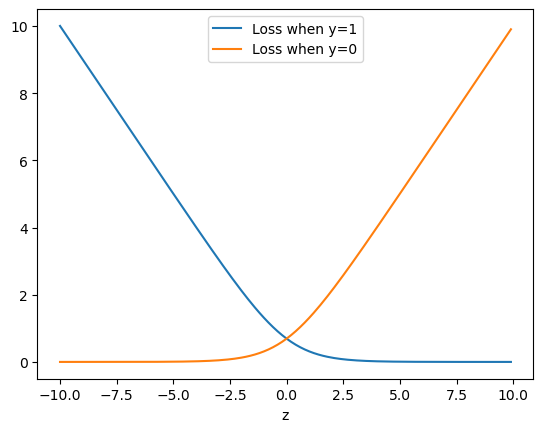

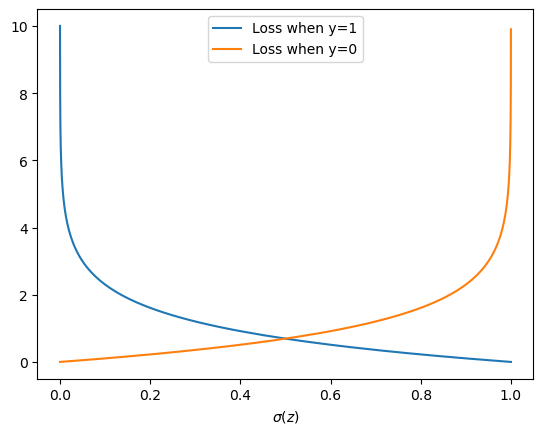

In [10]:
# Loss function for a single training example
def loss_1(z):
    # Loss when y=1
    return -np.log(sigmoid(z))
def loss_0(z):
    # Loss when y=0
    return -np.log(1-sigmoid(z))

z = np.arange(-10, 10, 0.1)
L1 = loss_1(z)
L0 = loss_0(z)

sigma_z = sigmoid(z)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(z, L1, label="Loss when y=1")
ax.plot(z, L0, label="Loss when y=0")
ax.set_xlabel("z")
ax.legend()

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(sigma_z, L1, label="Loss when y=1")
ax.plot(sigma_z, L0, label="Loss when y=0")
ax.set_xlabel(r"$\sigma(z)$")
ax.legend()

In [11]:
# Implement the logistic regression
class LogisticRegressionGD:
    def __init__(self, eta=0.01, n_iter=50, random_state=1):        
        # Learning rate
        self.eta = eta
        # Number of iterations during training. Also seems to be called number of epochs.
        self.n_iter = n_iter
        # random_state: used to initialize a random number generator. 
        # The weights and bias will be randomly initialized, and this requires a random number generator.
        self.random_state = random_state
    
    def fit(self, X, y):
        # Initialize weights and bias
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)
        # Values of the loss function at each iteration
        self.losses_ = []
        # Number of training examples
        num_data = X.shape[0]
        
        # Gradient descent
        for i in range(self.n_iter):
            # Calculate the gradient
            z = self.net_input(X)
            sigma_z = self.activation(z)
            error = sigma_z - y
            
            pLpw = np.dot(error, X) / num_data
            pLpb = np.mean(error)
            # Update the weights and bias
            self.w_ -= self.eta * pLpw
            self.b_ -= self.eta * pLpb
            # Calculate the loss
            loss = np.mean(-y * np.log(sigma_z) - (1-y) * np.log(1-sigma_z))
            self.losses_.append(loss)
            
            
            
    def net_input(self, X):
        # Return the net input for all training examples
        return np.dot(X, self.w_) + self.b_
    
    def activation(self, z):
        # The activation function is the sigmoid function 1/(1+exp(-z))
        z_clip = np.clip(z, -250, 250) # If z<-250, z_clip=-250. If z>250, z_clip=250
        return 1.0 / (1.0 + np.exp(-z_clip))
    
    def predict(self, X):
        z = self.net_input(X)
        p = self.activation(z)
        return np.where(p>=0.5, 1, 0)

In [14]:
# Load data from sklearn
iris = datasets.load_iris()
# Select features. iris data is a 4-column matrix. Here, the last two columns are selected.
X = iris.data[:, [2,3]]
# Get labels. iris.target is a 1D array.
y = iris.target

# Split the original data
X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size = 0.3, random_state=1, stratify=y)

# Feature scaling
# Create an object of 'StandardScaler' class.
sc = StandardScaler()
# Get the mean and standard deviation of the training set.
sc.fit(X_train)
# Rescale the training set
X_train_std = sc.transform(X_train)
# Rescale the testing set
X_test_std = sc.transform(X_test)
# The rescaling formular is z = (x - u) / s



In [15]:
# Logitstic regression only works for binary classification
# We only choose those training examples with label 0 or 1
X_train_01_subset = X_train_std[(y_train==0)|(y_train==1)]
y_train_01_subset = y_train[(y_train==0)|(y_train==1)]

In [16]:
# Define and train the model
lrgd = LogisticRegressionGD(eta=0.3, n_iter=1000, random_state=1)
lrgd.fit(X_train_01_subset, y_train_01_subset)

In [17]:
# Visualization
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # Create lists of markers and colors
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    
    # np.unique: find the unique elements of an array
    # The output y only has two possible values, 0 and 1. Therefore np.unique(y) is 2.
    # Then colors[:len(np.unique(y))] is colors[:2], i.e., colors = ('red', 'blue')
    # This is suitable for discrete colors.
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # Set the range 
    # The range of the figure is larger than the range of the features.
    # Prevent data points from lying on the edges of the figure.
    x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() + 1 
    x2_min, x2_max = X[:,1].min() - 1, X[:,1].max() + 1 
    # Generate meshgrid
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    # np.ravel(): flatten an array. It returns a 1D-array
    # The input of the function 'predict' is X. Each column of X corresponds to a feature.
    # Therefore, after raveling, we need to transpose the array.
    # lab: labels for all grid points
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    # The output of 'predict' is a 1D-array. It is reshaped to have the same shape as xx1
    lab = lab.reshape(xx1.shape)
    
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    # alpha: control the transparency
    ax.contourf(xx1, xx2, lab, alpha=0.2, cmap=cmap)
    
    # Plot training examples
    # enumerate: 
    for idx, cl in enumerate(np.unique(y)):
        ax.scatter(x=X[y==cl,0], y=X[y==cl,1], alpha=1, c=colors[idx], marker=markers[idx], label='Class {}'.format(cl), edgecolor="black")
    ax.legend()
    



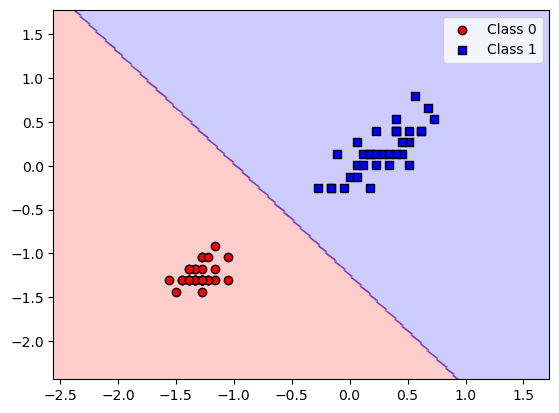

In [18]:
plot_decision_regions(X=X_train_01_subset, y=y_train_01_subset, classifier=lrgd)